In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
# import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine('sqlite:///hawaii.sqlite')


In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# Base.classes.<class name>
Measurement = base.classes.measurement
Station = base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


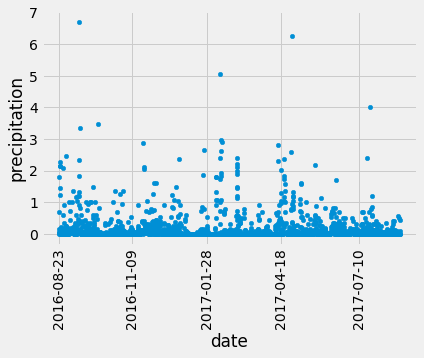

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
hawaii_df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
hawaii_df.set_index('date', inplace=True)
hawaii_df = hawaii_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
# hawaii_df.plot(rot=90)
def scatter_plot_df(df, labels):
    df.reset_index().plot(kind='scatter', x='date', y='precipitation', rot=90)
    ticks = labels
    plt.xticks(ticks)
    return df.describe()
scatter_plot_df(hawaii_df, labels=['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [79]:
# How many stations are available in this dataset?
session.query(Measurement.tobs).all()

[(65.0,),
 (63.0,),
 (74.0,),
 (76.0,),
 (73.0,),
 (70.0,),
 (64.0,),
 (68.0,),
 (73.0,),
 (64.0,),
 (61.0,),
 (66.0,),
 (65.0,),
 (68.0,),
 (64.0,),
 (72.0,),
 (66.0,),
 (66.0,),
 (69.0,),
 (67.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (76.0,),
 (68.0,),
 (72.0,),
 (70.0,),
 (67.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (67.0,),
 (67.0,),
 (64.0,),
 (69.0,),
 (73.0,),
 (73.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (71.0,),
 (61.0,),
 (69.0,),
 (63.0,),
 (64.0,),
 (65.0,),
 (67.0,),
 (68.0,),
 (65.0,),
 (76.0,),
 (75.0,),
 (66.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (70.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (70.0,),
 (71.0,),
 (68.0,),
 (70.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (74.0,),
 (72.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (72.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (68.0,),
 (70.0,),
 (71.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (75.0,),


In [123]:
# What are the most active stations?
# List the stations and the counts in descending order.
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [90]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)\
              .filter(Measurement.station == 'USC00519281')).all()

[(53.0, 87.0, 71.66378066378067)]

In [95]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['Tobs'])

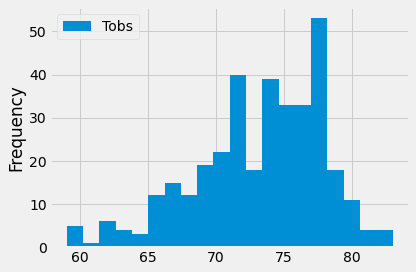

In [110]:
df.plot.hist(bins=20)
plt.tight_layout()
plt.xlabel='Temperature'

In [111]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates



# Challenge